<a href="https://colab.research.google.com/github/siddartha1192/edurekaCourses/blob/main/CNN_Demo_with_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective: To develop and train CNN with CIFAR10 dataset.

Total Images: 60000X32X32X3 with 10 classes
Train Images: 50000
Test Images:10000

In [ ]:
#Import Libraries
import keras
import tensorflow as tf
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization,LeakyReLU
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical

In [ ]:
#Load Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
print(x_train[150])

[[[ 66  37  25]
  [ 75  47  32]
  [ 84  56  39]
  ...
  [ 69  51  43]
  [104  87  73]
  [102  86  72]]

 [[ 72  62  50]
  [ 70  61  46]
  [116 107  90]
  ...
  [ 86  73  68]
  [153 141 130]
  [148 137 125]]

 [[ 86  85  75]
  [ 79  77  66]
  [145 144 130]
  ...
  [ 85  77  74]
  [156 150 141]
  [151 146 135]]

 ...

 [[123 131 118]
  [124 132 119]
  [130 138 125]
  ...
  [144 153 139]
  [151 162 148]
  [186 197 185]]

 [[134 142 129]
  [135 143 130]
  [140 148 135]
  ...
  [144 152 139]
  [169 178 164]
  [224 232 222]]

 [[130 138 125]
  [132 139 127]
  [137 145 132]
  ...
  [149 156 144]
  [186 193 180]
  [223 228 219]]]


In [ ]:
print(y_train[150])

[3]


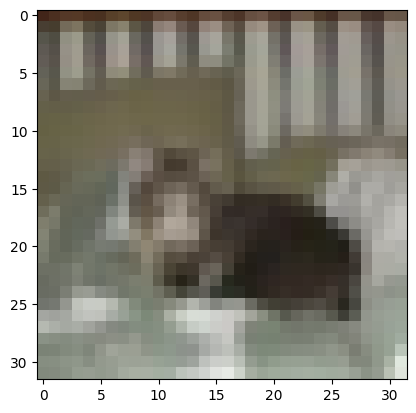

In [ ]:
#Show Image
plt.imshow(x_train[150])
plt.show()

Data Prepration

In [ ]:
#Normalization
x_train=x_train/255
x_test=x_test/255

In [ ]:
print(x_train[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [ ]:
#Process Categorical Data
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


**Model Building**

In [ ]:
#Base Model
model_1=Sequential()

model_1.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=(32,32,3)))  #First CNN layer
model_1.add(LeakyReLU(alpha=0.1))  #Small slope alpha=0.1

model_1.add(Conv2D(filters=32,kernel_size=(3,3)))  #Second CNN layer
model_1.add(LeakyReLU(alpha=0.1))

model_1.add(MaxPooling2D(pool_size=(2,2)))  #Pooling Layer

model_1.add(Flatten())

model_1.add(Dense(256))
model_1.add(LeakyReLU(alpha=0.1)) #Hidden layer

model_1.add(Dense(10,activation='softmax')) #Output layer


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,613,546 (6.16 MB)

 Trainable params: 1,613,546 (6.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Compile Model
model_1.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adamax(learning_rate=0.005),metrics=['accuracy'])

In [ ]:
#Train the Model
history_1=model_1.fit(x_train,y_train,
                      epochs=10,
                      batch_size=32,
                      validation_split=0.1,
                      shuffle=True,
                      verbose=2
                      )

Epoch 1/10
1407/1407 - 9s - 6ms/step - accuracy: 0.4982 - loss: 1.4134 - val_accuracy: 0.6218 - val_loss: 1.0906
Epoch 2/10
1407/1407 - 5s - 4ms/step - accuracy: 0.6579 - loss: 0.9809 - val_accuracy: 0.6728 - val_loss: 0.9581
Epoch 3/10
1407/1407 - 10s - 7ms/step - accuracy: 0.7355 - loss: 0.7615 - val_accuracy: 0.7000 - val_loss: 0.9231
Epoch 4/10
1407/1407 - 4s - 3ms/step - accuracy: 0.8114 - loss: 0.5440 - val_accuracy: 0.6934 - val_loss: 0.9853
Epoch 5/10
1407/1407 - 4s - 3ms/step - accuracy: 0.8844 - loss: 0.3394 - val_accuracy: 0.6950 - val_loss: 1.1400
Epoch 6/10
1407/1407 - 6s - 4ms/step - accuracy: 0.9362 - loss: 0.1911 - val_accuracy: 0.6936 - val_loss: 1.3658
Epoch 7/10
1407/1407 - 5s - 3ms/step - accuracy: 0.9670 - loss: 0.1011 - val_accuracy: 0.6806 - val_loss: 1.7243
Epoch 8/10
1407/1407 - 5s - 3ms/step - accuracy: 0.9814 - loss: 0.0583 - val_accuracy: 0.6726 - val_loss: 1.9337
Epoch 9/10
1407/1407 - 5s - 4ms/step - accuracy: 0.9872 - loss: 0.0398 - val_accuracy: 0.6920 -

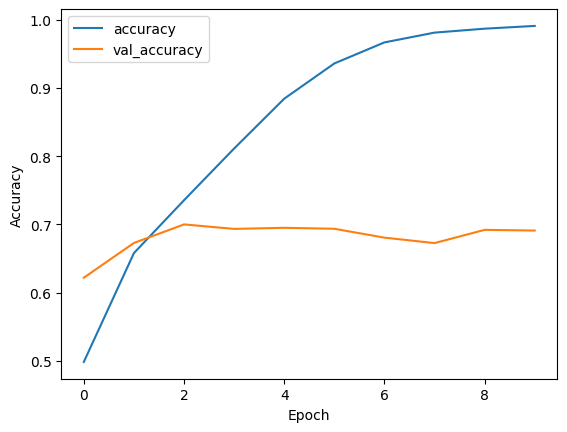

In [ ]:
#Evaluate Model
plt.plot(history_1.history['accuracy'],label='accuracy')
plt.plot(history_1.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

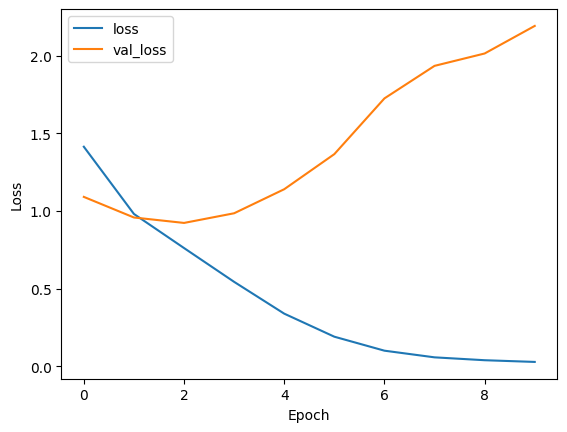

In [ ]:
#Evaluate Model
plt.plot(history_1.history['loss'],label='loss')
plt.plot(history_1.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Model_2: Adding Max pool after each Conv layer
model_2=Sequential()

model_2.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=(32,32,3)))  #First CNN layer
model_2.add(LeakyReLU(alpha=0.1))  #Small slope alpha=0.1

model_2.add(MaxPooling2D(pool_size=(2,2)))  #Pooling Layer

model_2.add(Conv2D(filters=32,kernel_size=(3,3)))  #Second CNN layer
model_2.add(LeakyReLU(alpha=0.1))

model_2.add(MaxPooling2D(pool_size=(2,2)))  #Pooling Layer

model_2.add(Flatten())

model_2.add(Dense(256))
model_2.add(LeakyReLU(alpha=0.1)) #Hidden layer

model_2.add(Dense(10,activation='softmax')) #Output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 302,826 (1.16 MB)

 Trainable params: 302,826 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Compile Model
model_2.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adamax(learning_rate=0.005),metrics=['accuracy'])

In [ ]:
#Train the Model 2
history_1=model_2.fit(x_train,y_train,
                      epochs=10,
                      batch_size=32,
                      validation_split=0.1,
                      shuffle=True,
                      verbose=2
                      )

Epoch 1/10
1407/1407 - 8s - 6ms/step - accuracy: 0.4710 - loss: 1.4499 - val_accuracy: 0.5626 - val_loss: 1.2347
Epoch 2/10
1407/1407 - 7s - 5ms/step - accuracy: 0.6078 - loss: 1.1101 - val_accuracy: 0.6338 - val_loss: 1.0355
Epoch 3/10
1407/1407 - 5s - 3ms/step - accuracy: 0.6713 - loss: 0.9400 - val_accuracy: 0.6576 - val_loss: 0.9750
Epoch 4/10
1407/1407 - 5s - 4ms/step - accuracy: 0.7179 - loss: 0.8068 - val_accuracy: 0.6734 - val_loss: 0.9615
Epoch 5/10
1407/1407 - 4s - 3ms/step - accuracy: 0.7572 - loss: 0.6916 - val_accuracy: 0.6826 - val_loss: 0.9484
Epoch 6/10
1407/1407 - 5s - 3ms/step - accuracy: 0.7974 - loss: 0.5854 - val_accuracy: 0.6920 - val_loss: 0.9320
Epoch 7/10
1407/1407 - 4s - 3ms/step - accuracy: 0.8305 - loss: 0.4932 - val_accuracy: 0.6988 - val_loss: 0.9522
Epoch 8/10
1407/1407 - 5s - 3ms/step - accuracy: 0.8603 - loss: 0.4042 - val_accuracy: 0.6998 - val_loss: 1.0236
Epoch 9/10
1407/1407 - 4s - 3ms/step - accuracy: 0.8895 - loss: 0.3244 - val_accuracy: 0.6926 - 

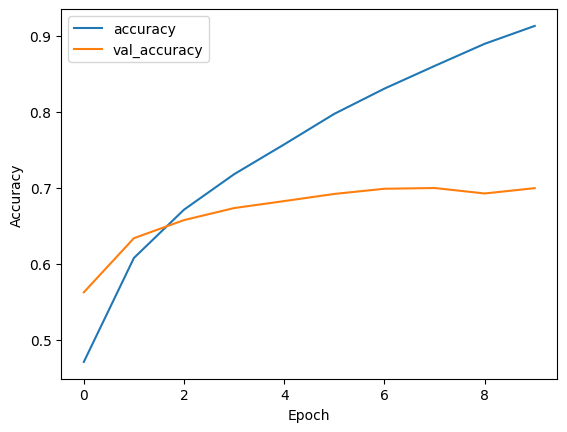

In [ ]:
#Evaluate Model_2 Optimized Model
plt.plot(history_1.history['accuracy'],label='accuracy')
plt.plot(history_1.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Model_3 Adding dropout layers in CNN
model_3=Sequential()

model_3.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=(32,32,3)))  #First CNN layer
model_3.add(LeakyReLU(alpha=0.1))  #Small slope alpha=0.1

model_3.add(Dropout(0.2))  #First dropout

model_3.add(Conv2D(filters=32,kernel_size=(3,3)))  #Second CNN layer
model_3.add(LeakyReLU(alpha=0.1))

model_3.add(Dropout(0.2)) #second Dropout

model_3.add(MaxPooling2D(pool_size=(2,2)))  #Pooling Layer

model_3.add(Flatten())

model_3.add(Dense(256))
model_3.add(LeakyReLU(alpha=0.1)) #Hidden layer

model_3.add(Dropout(0.5)) #third dropout

model_3.add(Dense(10,activation='softmax')) #Output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
#Compile Model
model_3.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adamax(learning_rate=0.005),metrics=['accuracy'])

In [ ]:
#Train the Model 3
history_1=model_3.fit(x_train,y_train,
                      epochs=10,
                      batch_size=32,
                      validation_split=0.1,
                      shuffle=True,
                      verbose=2
                      )

Epoch 1/10
1407/1407 - 12s - 8ms/step - accuracy: 0.4235 - loss: 1.6000 - val_accuracy: 0.4000 - val_loss: 1.8444
Epoch 2/10
1407/1407 - 5s - 3ms/step - accuracy: 0.5576 - loss: 1.2440 - val_accuracy: 0.4840 - val_loss: 1.6675
Epoch 3/10
1407/1407 - 5s - 4ms/step - accuracy: 0.6285 - loss: 1.0585 - val_accuracy: 0.6252 - val_loss: 1.1071
Epoch 4/10
1407/1407 - 10s - 7ms/step - accuracy: 0.6626 - loss: 0.9536 - val_accuracy: 0.5866 - val_loss: 1.2977
Epoch 5/10
1407/1407 - 5s - 3ms/step - accuracy: 0.6906 - loss: 0.8741 - val_accuracy: 0.6498 - val_loss: 1.0839
Epoch 6/10
1407/1407 - 5s - 4ms/step - accuracy: 0.7151 - loss: 0.8088 - val_accuracy: 0.6590 - val_loss: 1.0280
Epoch 7/10
1407/1407 - 5s - 4ms/step - accuracy: 0.7322 - loss: 0.7562 - val_accuracy: 0.6586 - val_loss: 1.0357
Epoch 8/10
1407/1407 - 5s - 3ms/step - accuracy: 0.7497 - loss: 0.7085 - val_accuracy: 0.6632 - val_loss: 1.0647
Epoch 9/10
1407/1407 - 5s - 4ms/step - accuracy: 0.7654 - loss: 0.6632 - val_accuracy: 0.6546 

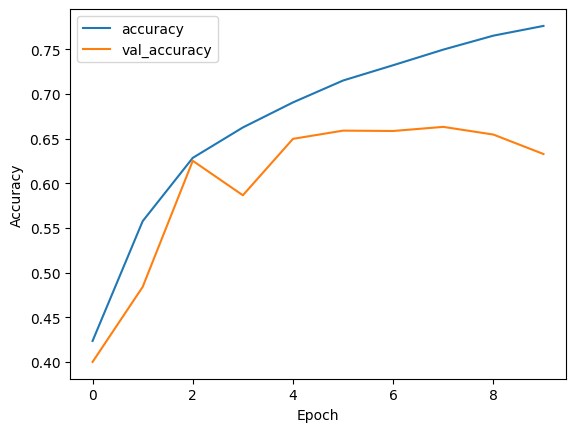

In [ ]:
#Evaluate Model_3 After adding dropout layers
plt.plot(history_1.history['accuracy'],label='accuracy')
plt.plot(history_1.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Model_4 Adding mode Conv layers layers in CNN
model_4=Sequential()

model_4.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=(32,32,3)))  #First CNN layer
model_4.add(LeakyReLU(alpha=0.1))  #Small slope alpha=0.1

model_4.add(Dropout(0.2))  #First dropout

model_4.add(Conv2D(filters=32,kernel_size=(3,3)))  #Second CNN layer
model_4.add(LeakyReLU(alpha=0.1))

model_4.add(Dropout(0.2)) #second Dropout

model_4.add(MaxPooling2D(pool_size=(2,2)))  #Pooling Layer


#another set of Conv layers

model_4.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=(32,32,3)))  #First CNN layer
model_4.add(LeakyReLU(alpha=0.1))  #Small slope alpha=0.1

model_4.add(Dropout(0.2))  #First dropout

model_4.add(Conv2D(filters=32,kernel_size=(3,3)))  #Second CNN layer
model_4.add(LeakyReLU(alpha=0.1))

model_4.add(Dropout(0.2)) #second Dropout

model_4.add(MaxPooling2D(pool_size=(2,2)))  #Pooling Layer

model_4.add(Flatten())

model_4.add(Dense(256))
model_4.add(LeakyReLU(alpha=0.1)) #Hidden layer

model_4.add(Dropout(0.5)) #third dropout

model_4.add(Dense(10,activation='softmax')) #Output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
model_4.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_23 (LeakyReLU)      │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_24 (LeakyReLU)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 12, 12, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_25 (LeakyReLU)      │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 10, 10, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_26 (LeakyReLU)      │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_27 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221,978 (867.10 KB)

 Trainable params: 221,978 (867.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_4.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adamax(learning_rate=0.005),metrics=['accuracy'])

In [ ]:
history_1=model_4.fit(x_train,y_train,
                      epochs=10,
                      batch_size=32,
                      validation_split=0.1,
                      shuffle=True,
                      verbose=2
                      )

Epoch 1/10
1407/1407 - 16s - 11ms/step - accuracy: 0.3849 - loss: 1.6780 - val_accuracy: 0.5002 - val_loss: 1.4329
Epoch 2/10
1407/1407 - 13s - 9ms/step - accuracy: 0.5285 - loss: 1.3109 - val_accuracy: 0.5816 - val_loss: 1.2066
Epoch 3/10
1407/1407 - 5s - 3ms/step - accuracy: 0.5884 - loss: 1.1643 - val_accuracy: 0.6250 - val_loss: 1.0689
Epoch 4/10
1407/1407 - 6s - 4ms/step - accuracy: 0.6200 - loss: 1.0842 - val_accuracy: 0.6500 - val_loss: 1.0010
Epoch 5/10
1407/1407 - 13s - 9ms/step - accuracy: 0.6436 - loss: 1.0166 - val_accuracy: 0.6584 - val_loss: 1.0031
Epoch 6/10
1407/1407 - 9s - 6ms/step - accuracy: 0.6546 - loss: 0.9760 - val_accuracy: 0.6934 - val_loss: 0.9038
Epoch 7/10
1407/1407 - 7s - 5ms/step - accuracy: 0.6686 - loss: 0.9382 - val_accuracy: 0.6724 - val_loss: 0.9776
Epoch 8/10
1407/1407 - 12s - 9ms/step - accuracy: 0.6803 - loss: 0.9003 - val_accuracy: 0.6992 - val_loss: 0.8685
Epoch 9/10
1407/1407 - 7s - 5ms/step - accuracy: 0.6880 - loss: 0.8866 - val_accuracy: 0.70

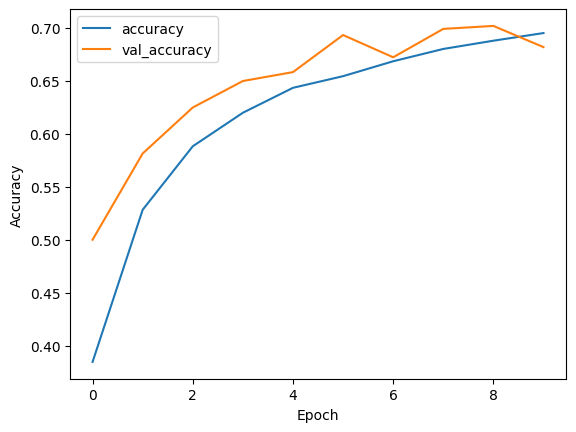

In [ ]:
#Evaluate Model_4 After adding more Conv layers
plt.plot(history_1.history['accuracy'],label='accuracy')
plt.plot(history_1.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Make some Predictions
y_pred=model_4.predict(x_test)

y_pred_index=np.argmax(y_pred,axis=1)
print(y_pred_index)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[3 8 8 ... 5 1 7]


[[645   9 139  23  34   5   6   6 119  14]
 [ 29 780  29  21   7  10  18   3  59  44]
 [ 36   2 761  57  47  29  44  12  11   1]
 [ 14   2 196 539  72  85  64  15   9   4]
 [  8   1 197  67 624   7  53  33  10   0]
 [  5   1 161 292  56 438  19  22   6   0]
 [  2   1 130  65  26   4 763   2   7   0]
 [  9   0 115  87 102  41   5 634   5   2]
 [ 33  14  31  27  11   5   7   2 865   5]
 [ 31  88  39  48  25   9  14  20  73 653]]
              precision    recall  f1-score   support

           0       0.79      0.65      0.71      1000
           1       0.87      0.78      0.82      1000
           2       0.42      0.76      0.54      1000
           3       0.44      0.54      0.48      1000
           4       0.62      0.62      0.62      1000
           5       0.69      0.44      0.54      1000
           6       0.77      0.76      0.77      1000
           7       0.85      0.63      0.72      1000
           8       0.74      0.86      0.80      1000
           9       0.90     

Text(95.72222222222221, 0.5, 'Truth')

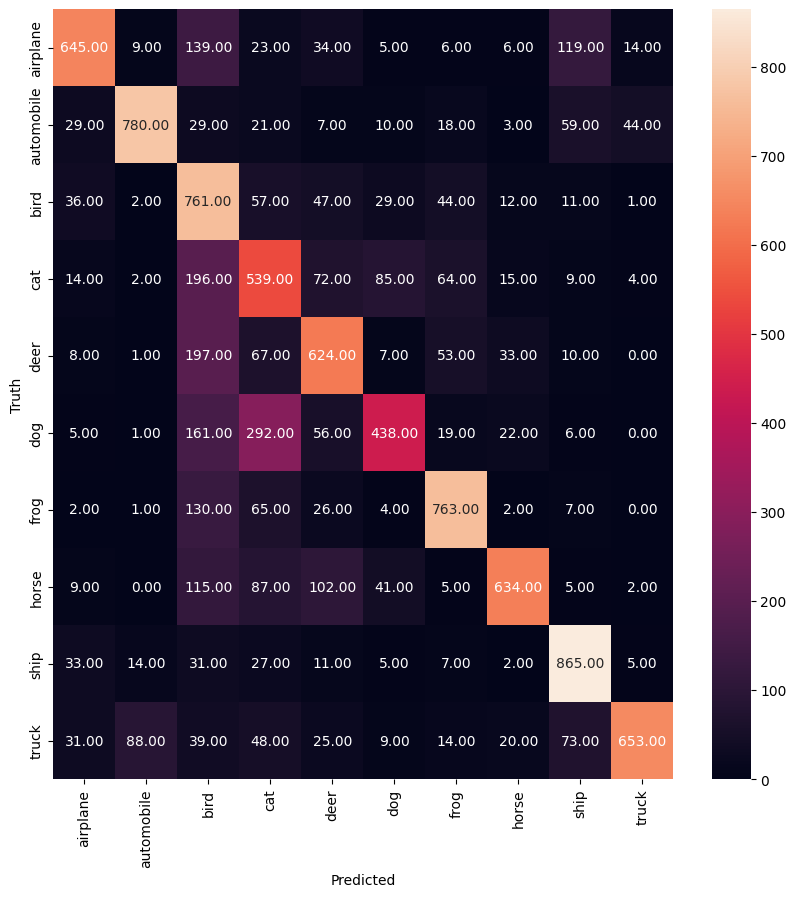

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(np.argmax(y_test, axis=1),y_pred_index)
print(cm)
print(classification_report(np.argmax(y_test, axis=1),y_pred_index))

plt.figure(figsize=(10,10))
import seaborn as sns
cifar_classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=cifar_classes,yticklabels=cifar_classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Fetching Image Data from source**

In [ ]:
import zipfile
import requests
import os

#Source URL
drop_box_url="https://www.dropbox.com/s/h16vq9rab1itifs/CatDog.zip?dl=1"

#Download Zip file
zip_path='CatDog.zip'
with open(zip_path,'wb') as f:
  response=requests.get(drop_box_url)
  f.write(response.content)

#Unzip file
with zipfile.ZipFile(zip_path,'r') as f:
  f.extractall('Image_data')

Image Data Generator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1.0/255,validation_split=0.2)

#Load training data
train_generator=datagen.flow_from_directory(
    directory='Image_data',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Validation_generator=datagen.flow_from_directory(
    directory='Image_data',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [ ]:
print(train_generator[0])

(array([[[[0.3137255 , 0.28627452, 0.24705884],
         [0.31764707, 0.2901961 , 0.2509804 ],
         [0.32156864, 0.29411766, 0.25490198],
         ...,
         [0.26666668, 0.2392157 , 0.20000002],
         [0.26666668, 0.2392157 , 0.20000002],
         [0.2627451 , 0.23529413, 0.19607845]],

        [[0.3137255 , 0.28627452, 0.24705884],
         [0.31764707, 0.2901961 , 0.2509804 ],
         [0.32156864, 0.29411766, 0.25490198],
         ...,
         [0.26666668, 0.2392157 , 0.20000002],
         [0.26666668, 0.2392157 , 0.20000002],
         [0.26666668, 0.2392157 , 0.20000002]],

        [[0.3137255 , 0.28627452, 0.24705884],
         [0.31764707, 0.2901961 , 0.2509804 ],
         [0.32156864, 0.29411766, 0.25490198],
         ...,
         [0.26666668, 0.2392157 , 0.20000002],
         [0.26666668, 0.2392157 , 0.20000002],
         [0.27058825, 0.24313727, 0.20392159]],

        ...,

        [[0.37254903, 0.3372549 , 0.34901962],
         [0.35686275, 0.33333334, 0.34117648

In [ ]:
print(type(train_generator))

<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>


**Transfer Learning**

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
vgg_model=VGG16(weights='imagenet',include_top=False,input_shape=(32,32,3),pooling='max')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
transfer_layer=vgg_model.get_layer('block3_pool')

In [ ]:
vgg_model.trainable=False #Freezing layers

In [ ]:
layers=Flatten()(transfer_layer.output)

layers=Dense(256,activation='relu')(layers)

layers=Dense(128,activation='relu')(layers)

layers=Dropout(0.5)(layers)

layers=BatchNormalization()(layers)

pred=Dense(10,activation='softmax')(layers)

#Model Intilization

model_5=Model(inputs=vgg_model.input,outputs=pred)

In [ ]:
model_5.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,819,018 (10.75 MB)

 Trainable params: 1,083,274 (4.13 MB)

 Non-trainable params: 1,735,744 (6.62 MB)

In [ ]:
model_5.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adamax(learning_rate=0.0005),metrics=['accuracy'])

In [ ]:
history_5=model_5.fit(x_train,y_train,epochs=15,batch_size=128,validation_split=0.1,shuffle=True,verbose=2)

Epoch 1/15
352/352 - 11s - 31ms/step - accuracy: 0.4785 - loss: 1.5228 - val_accuracy: 0.6634 - val_loss: 1.0263
Epoch 2/15
352/352 - 5s - 14ms/step - accuracy: 0.6339 - loss: 1.0916 - val_accuracy: 0.7098 - val_loss: 0.8741
Epoch 3/15
352/352 - 5s - 15ms/step - accuracy: 0.6790 - loss: 0.9547 - val_accuracy: 0.7362 - val_loss: 0.7930
Epoch 4/15
352/352 - 10s - 29ms/step - accuracy: 0.7098 - loss: 0.8660 - val_accuracy: 0.7522 - val_loss: 0.7417
Epoch 5/15
352/352 - 5s - 14ms/step - accuracy: 0.7293 - loss: 0.8006 - val_accuracy: 0.7584 - val_loss: 0.7054
Epoch 6/15
352/352 - 5s - 15ms/step - accuracy: 0.7463 - loss: 0.7512 - val_accuracy: 0.7710 - val_loss: 0.6906
Epoch 7/15
352/352 - 5s - 14ms/step - accuracy: 0.7568 - loss: 0.7189 - val_accuracy: 0.7704 - val_loss: 0.6802
Epoch 8/15
352/352 - 5s - 14ms/step - accuracy: 0.7757 - loss: 0.6600 - val_accuracy: 0.7716 - val_loss: 0.6518
Epoch 9/15
352/352 - 5s - 14ms/step - accuracy: 0.7907 - loss: 0.6250 - val_accuracy: 0.7866 - val_los

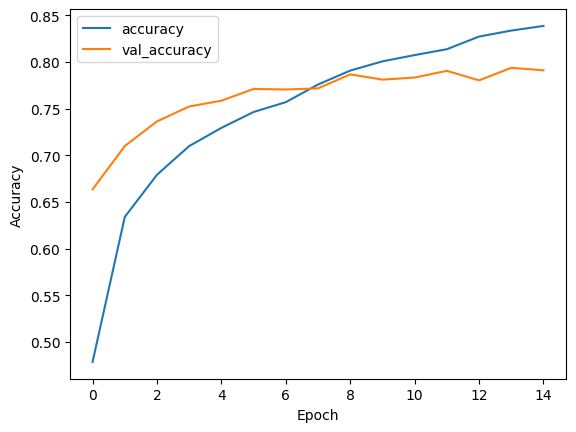

In [ ]:
#Evaluate Model_5 After Transfer Learning from VGG16
plt.plot(history_5.history['accuracy'],label='accuracy')
plt.plot(history_5.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

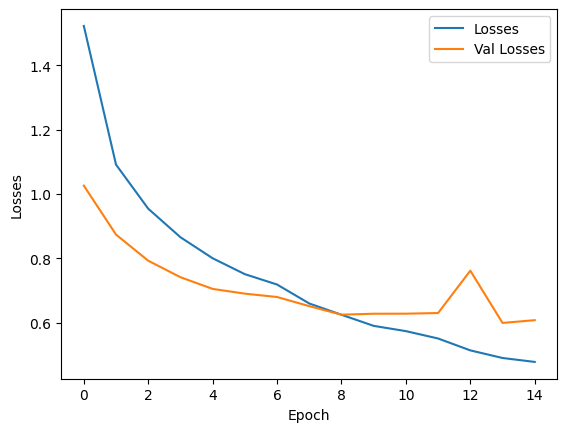

In [ ]:
plt.plot(history_5.history['loss'],label='Losses')
plt.plot(history_5.history['val_loss'],label='Val Losses')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend()
plt.show()

In [ ]:
#Make some Predictions
y_pred=model_5.predict(x_test)

y_pred_index=np.argmax(y_pred,axis=1)
print(y_pred_index)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
[3 8 8 ... 5 1 7]


[[788  13  70  27  20   4  10  17  27  24]
 [ 14 870  11   5   1   9  11   1  11  67]
 [ 31   4 756  36  70  39  41  20   0   3]
 [ 10   5  65 600  57 161  61  28   3  10]
 [  8   1  59  38 782  34  36  34   5   3]
 [  3   5  32 140  38 715  30  34   1   2]
 [  5   2  33  41  19  31 855   5   4   5]
 [  4   0  36  24  59  44   3 824   1   5]
 [ 47  26  22  13  20   5   5   2 840  20]
 [ 13  67  17  17   2   7   3  18  12 844]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1000
           1       0.88      0.87      0.87      1000
           2       0.69      0.76      0.72      1000
           3       0.64      0.60      0.62      1000
           4       0.73      0.78      0.76      1000
           5       0.68      0.71      0.70      1000
           6       0.81      0.85      0.83      1000
           7       0.84      0.82      0.83      1000
           8       0.93      0.84      0.88      1000
           9       0.86     

Text(95.72222222222221, 0.5, 'Truth')

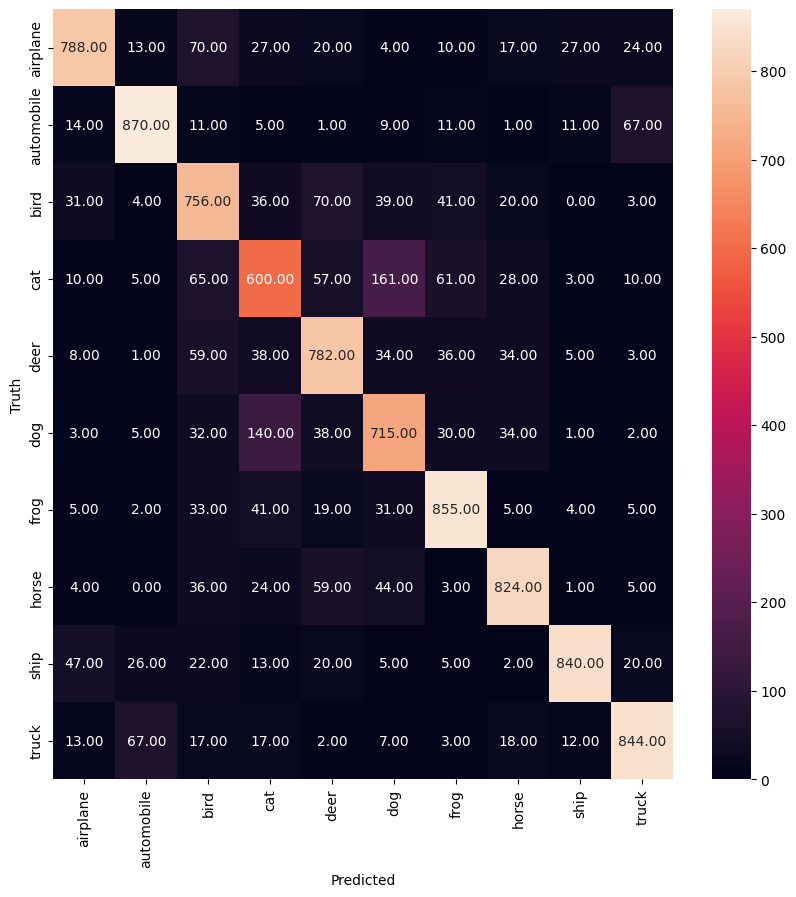

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(np.argmax(y_test, axis=1),y_pred_index)
print(cm)
print(classification_report(np.argmax(y_test, axis=1),y_pred_index))

plt.figure(figsize=(10,10))
import seaborn as sns
cifar_classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=cifar_classes,yticklabels=cifar_classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.ylabel('Truth')